In [16]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [4]:
df = pd.read_csv('../data/case_study_data.csv')
df.head()

,PRODUCT,SALESYEAR,LIFECYCLE,STATE,RELEASE_YEAR,DISEASE_RESISTANCE,INSECT_RESISTANCE,PROTECTION,DROUGHT_TOLERANCE,BRITTLE_STALK,PLANT_HEIGHT,RELATIVE_MATURITY,UNITS
0,P14,2021,ESTABLISHED,Texas,2013,0,0,1,5.0,3.0,1.0,3,0.0
1,P27,2021,INTRODUCTION,Texas,2019,0,0,1,3.0,4.0,2.0,3,0.2
2,P54,2021,ESTABLISHED,Texas,2018,0,1,1,5.0,4.0,1.0,4,4.6
3,P67,2021,EXPANSION,Texas,2014,0,1,1,4.0,5.0,3.0,4,9.7
4,P110,2021,EXPANSION,Texas,2018,0,0,1,3.0,4.0,3.0,4,0.2


In [5]:
# feature engineering
df['PRODUCT_AGE'] = df['SALESYEAR'] - df['RELEASE_YEAR']
df['UNITS_NORM_BY_PRODUCT'] = df.groupby('PRODUCT')['UNITS'].transform(lambda x: (x - x.mean()) / (x.std() + 1e-5))
df = df.sort_values(by=['STATE', 'PRODUCT', 'SALESYEAR'])
df['PREVIOUS_UNITS'] = (
    df.groupby(['STATE', 'PRODUCT'])['UNITS']
    .shift(1)
)
df['PREVIOUS_UNITS'] = df['PREVIOUS_UNITS'].fillna(0)
df.columns

Index(['PRODUCT', 'SALESYEAR', 'LIFECYCLE', 'STATE', 'RELEASE_YEAR',
       'DISEASE_RESISTANCE', 'INSECT_RESISTANCE', 'PROTECTION',
       'DROUGHT_TOLERANCE', 'BRITTLE_STALK', 'PLANT_HEIGHT',
       'RELATIVE_MATURITY', 'UNITS', 'PRODUCT_AGE', 'UNITS_NORM_BY_PRODUCT',
       'PREVIOUS_UNITS'],
      dtype='object')

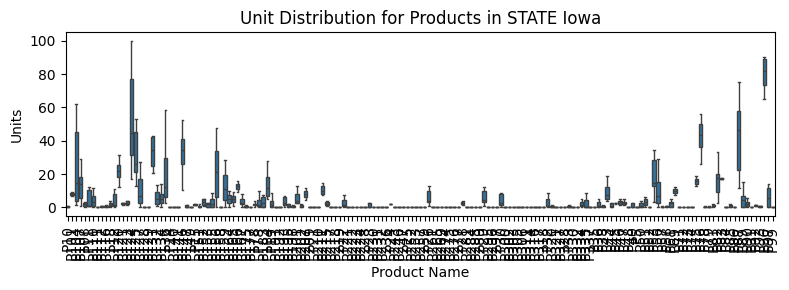

In [17]:
# prompt: for all PRODUCT in STATE Iowa, plot UNITS patter categorized by SALEYEAR, LIFECYCLE, using seaborn

# Filter data for STATE 'Iowa'
iowa_df = df[df['STATE'] == 'Iowa'].copy()
plt.figure(figsize=(8, 3))
# Use 'item' as the x-axis to show individual product variations
ax = sns.boxplot(data=iowa_df, x='PRODUCT', y='UNITS', showfliers=False)
plt.title(f'Unit Distribution for Products in STATE Iowa')
plt.xlabel('Product Name')
plt.ylabel('Units')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [7]:
groups = df.groupby(['PRODUCT_AGE', 'STATE', 'DISEASE_RESISTANCE',
                     'INSECT_RESISTANCE', 'DROUGHT_TOLERANCE', 'BRITTLE_STALK',
                     'PLANT_HEIGHT', 'RELATIVE_MATURITY'])

variance_by_group = groups['UNITS'].var().reset_index()
variance_by_group = variance_by_group.dropna(subset=['UNITS'])
variance_by_group = variance_by_group.rename(columns={'UNITS': 'UNITS_VARIANCE'})

# variance_by_group = variance_by_group.rename(columns={'UNITS': 'UNITS_VARIANCE'})

variance_by_group

,PRODUCT_AGE,STATE,DISEASE_RESISTANCE,INSECT_RESISTANCE,DROUGHT_TOLERANCE,BRITTLE_STALK,PLANT_HEIGHT,RELATIVE_MATURITY,UNITS_VARIANCE
9,2,California,0,0,2.0,3.0,2.0,4,0.003333
12,2,California,0,0,2.0,3.0,3.0,4,2.880000
14,2,California,0,0,2.0,4.0,3.0,2,0.070000
15,2,California,0,0,2.0,4.0,3.0,4,2.229167
20,2,California,0,0,3.0,3.0,2.0,2,0.045000
...,...,...,...,...,...,...,...,...,...
1155,11,NewYork,0,0,5.0,3.0,1.0,3,0.980000
1161,12,Illinois,0,0,2.0,3.0,3.0,4,0.980000
1162,12,Iowa,0,0,2.0,3.0,3.0,4,2.000000
1164,12,Iowa,0,0,5.0,5.0,2.0,4,1.125000


In [9]:
df['LIFECYCLE_encoded'] = df['LIFECYCLE'].replace({
    'INTRODUCTION': 1,
    'ESTABLISHED': 2,
    'EXPANSION': 3,
    'PHASEOUT': 4
})

print(df[['LIFECYCLE', 'LIFECYCLE_encoded']].head())

        LIFECYCLE  LIFECYCLE_encoded
1639  ESTABLISHED                  2
1740    EXPANSION                  3
1861    EXPANSION                  3
1959    EXPANSION                  3
2061     PHASEOUT                  4


/var/folders/1z/gfdkzdd54fg521rmgfpm6g_h0000gn/T/ipykernel_19958/1377558254.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LIFECYCLE_encoded'] = df['LIFECYCLE'].replace({


In [10]:
df['TRAITS'] = (df['DISEASE_RESISTANCE'].fillna(0).astype(int).astype(str) +
                 df['INSECT_RESISTANCE'].fillna(0).astype(int).astype(str) +
                 df['PROTECTION'].fillna(0).astype(int).astype(str) +
                 df['DROUGHT_TOLERANCE'].fillna(0).astype(float).astype(int).astype(str) +
                 df['BRITTLE_STALK'].fillna(0).astype(float).astype(int).astype(str) +
                 df['PLANT_HEIGHT'].fillna(0).astype(float).astype(int).astype(str) +
                 df['RELATIVE_MATURITY'].fillna(0).astype(int).astype(str) +
                 df['LIFECYCLE_encoded'].astype(str))
df['TRAITS']

1639    00014542
1740    00014543
1861    00014543
1959    00014543
2061    00014544
          ...   
50      00134341
85      00134341
51      00153341
143     00153343
113     01153342
Name: TRAITS, Length: 2166, dtype: object

In [11]:
# does Units varies even for exact same traits+attributes
sdf = df.query("UNITS > 20")
unique_traits = sdf['TRAITS'].unique()
trait_to_id = {trait: i for i, trait in enumerate(unique_traits)}
sdf['TRAITS_ID'] = df['TRAITS'].map(trait_to_id)

/var/folders/1z/gfdkzdd54fg521rmgfpm6g_h0000gn/T/ipykernel_19958/1197333365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['TRAITS_ID'] = df['TRAITS'].map(trait_to_id)


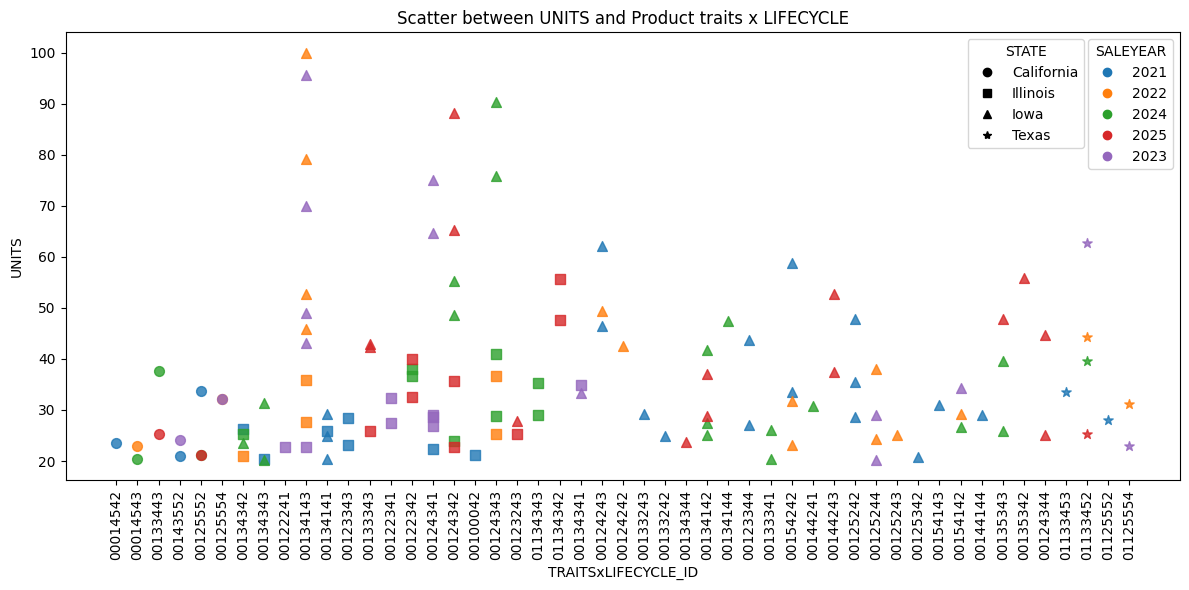

In [12]:

import matplotlib.lines as mlines

# create color mapping（SALESYEAR）
unique_syears = sdf['SALESYEAR'].unique()
syear_colors = plt.get_cmap('tab10').colors
color_dict = {state: syear_colors[i % len(syear_colors)] for i, state in enumerate(unique_syears)}

# create marker mapping（STATE）
unique_states = sdf['STATE'].unique()
markers = ['o', 's', '^', '*']
marker_dict = {lc: markers[i % len(markers)] for i, lc in enumerate(unique_states)}

# 创建绘图
plt.figure(figsize=(12, 6))

for syear in unique_syears:
    for state in unique_states:
        subset = sdf[(sdf['STATE'] == state) & (sdf['SALESYEAR'] == syear)]
        if not subset.empty:
            plt.scatter(
                subset['TRAITS_ID'],
                subset['UNITS'],
                color=color_dict[syear],
                marker=marker_dict[state],
                label=f'{state} - {syear}',
                s=50,
                alpha=0.8

            )

plt.xlabel('TRAITSxLIFECYCLE_ID')
plt.ylabel('UNITS')
plt.title('Scatter between UNITS and Product traits x LIFECYCLE')
plt.xticks(list(trait_to_id.values()), list(trait_to_id.keys()), rotation=90)

# Legend for SYEAR (color)
syear_legend_handles = [
    mlines.Line2D([], [], color=color_dict[syear], marker='o', linestyle='None', label=syear)
    for syear in unique_syears
]

# Legend for LIFECYCLE (marker)
state_legend_handles = [
    mlines.Line2D([], [], color='black', marker=marker_dict[state], linestyle='None', label=state)
    for state in unique_states
]

legend1 = plt.legend(handles=syear_legend_handles, title='SALEYEAR', loc='upper right')
legend2 = plt.legend(handles=state_legend_handles, title='STATE', bbox_to_anchor=(0.92, 1))
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.show()


/var/folders/1z/gfdkzdd54fg521rmgfpm6g_h0000gn/T/ipykernel_19958/3783954264.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_state = grouped_data.groupby('STATE').apply(lambda x: x.nlargest(5, 'UNITS')).reset_index(drop=True)


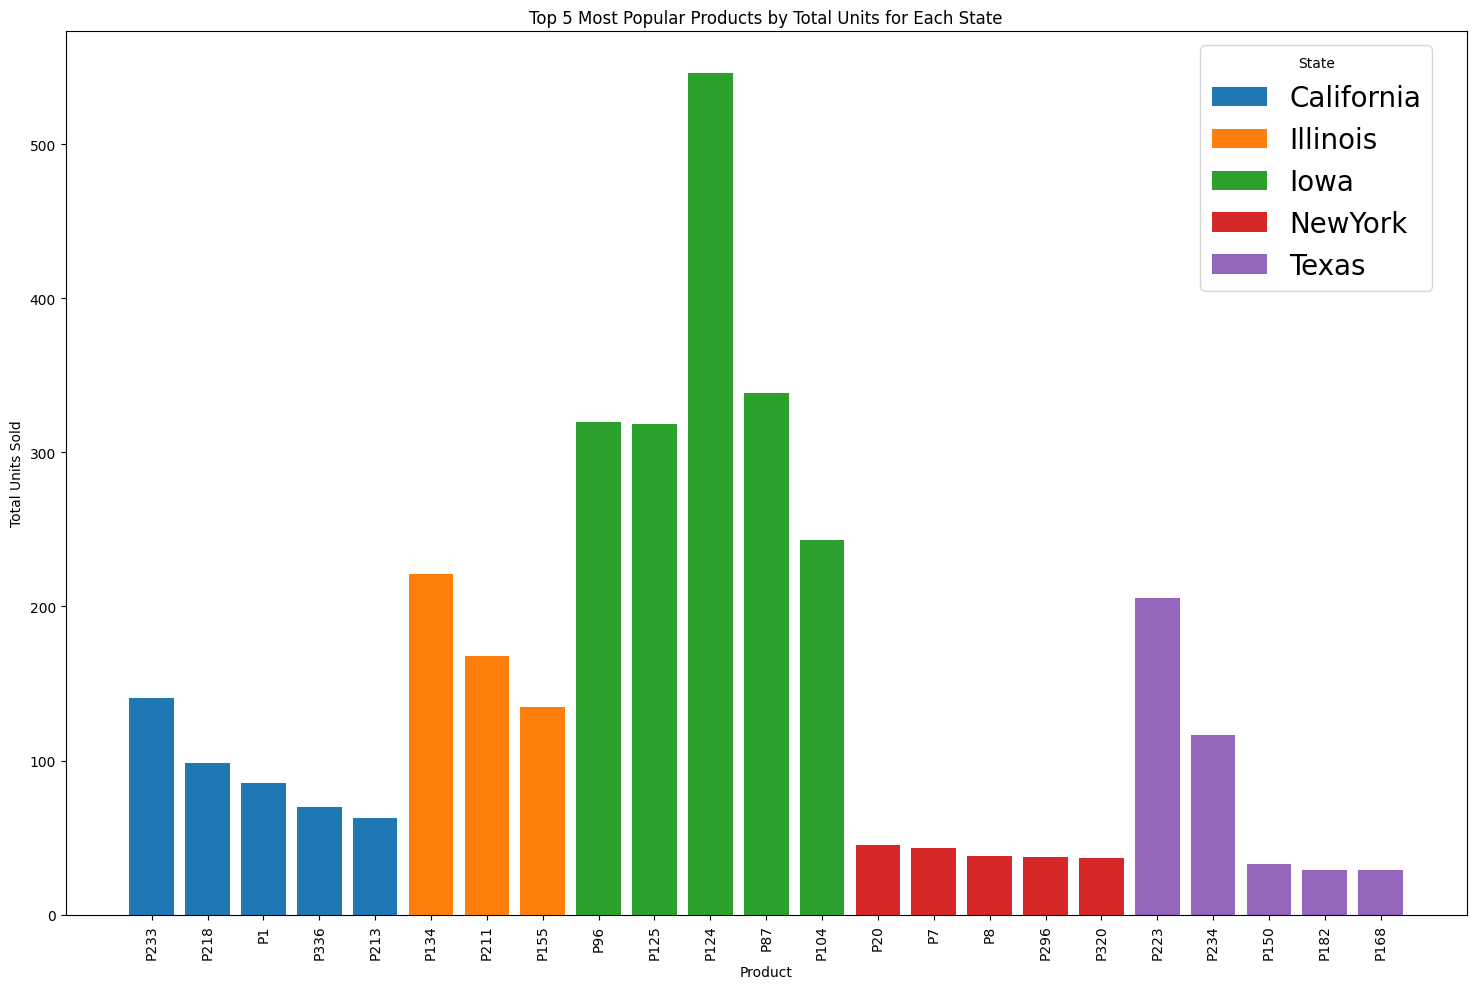

In [13]:
# prompt: plot most 5 popular PRODUCT (total UNITS) for each STATE

grouped_data = df.groupby(['STATE', 'PRODUCT'])['UNITS'].sum().reset_index()

# Get the top 5 products by units sold for each state
top_products_by_state = grouped_data.groupby('STATE').apply(lambda x: x.nlargest(5, 'UNITS')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(15, 10))
for state in top_products_by_state['STATE'].unique():
    state_data = top_products_by_state[top_products_by_state['STATE'] == state]
    plt.bar(state_data['PRODUCT'], state_data['UNITS'], label=state)

plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.title('Top 5 Most Popular Products by Total Units for Each State')
plt.xticks(rotation=90)
plt.legend(title='State', bbox_to_anchor=(0.80, 1), loc='upper left', fontsize=20)
plt.tight_layout()
plt.show()

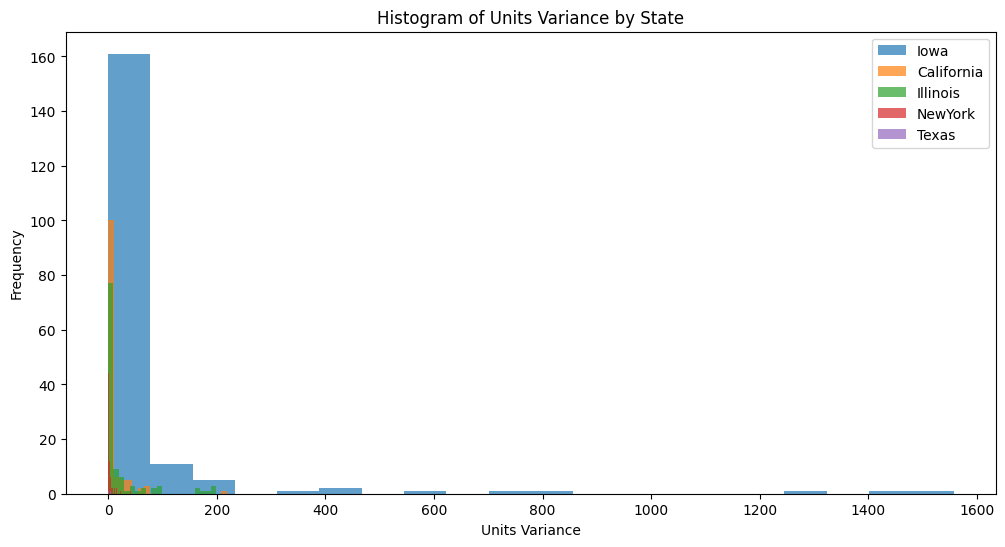

In [14]:
# prompt: sorted variance_by_group by UNITS_VARIANCE, plot hist ascending=False, color by STATE

variance_by_group_sorted = variance_by_group.sort_values(by='UNITS_VARIANCE', ascending=False)

# Plot histogram of UNITS_VARIANCE colored by STATE
plt.figure(figsize=(12, 6))
for state in variance_by_group_sorted['STATE'].unique():
    subset = variance_by_group_sorted[variance_by_group_sorted['STATE'] == state]
    plt.hist(subset['UNITS_VARIANCE'], bins=20, alpha=0.7, label=state)

plt.xlabel('Units Variance')
plt.ylabel('Frequency')
plt.title('Histogram of Units Variance by State')
plt.legend()
plt.show()

         STATE  PRODUCT_AGE  UNITS
0   California            2   85.1
1   California            3  246.9
2   California            4  237.2
3   California            5  287.7
4   California            6  229.7
..         ...          ...    ...
63       Texas            9   32.3
64       Texas           10   25.3
65       Texas           11   22.9
66       Texas           12    9.3
67       Texas           13    7.1

[68 rows x 3 columns]


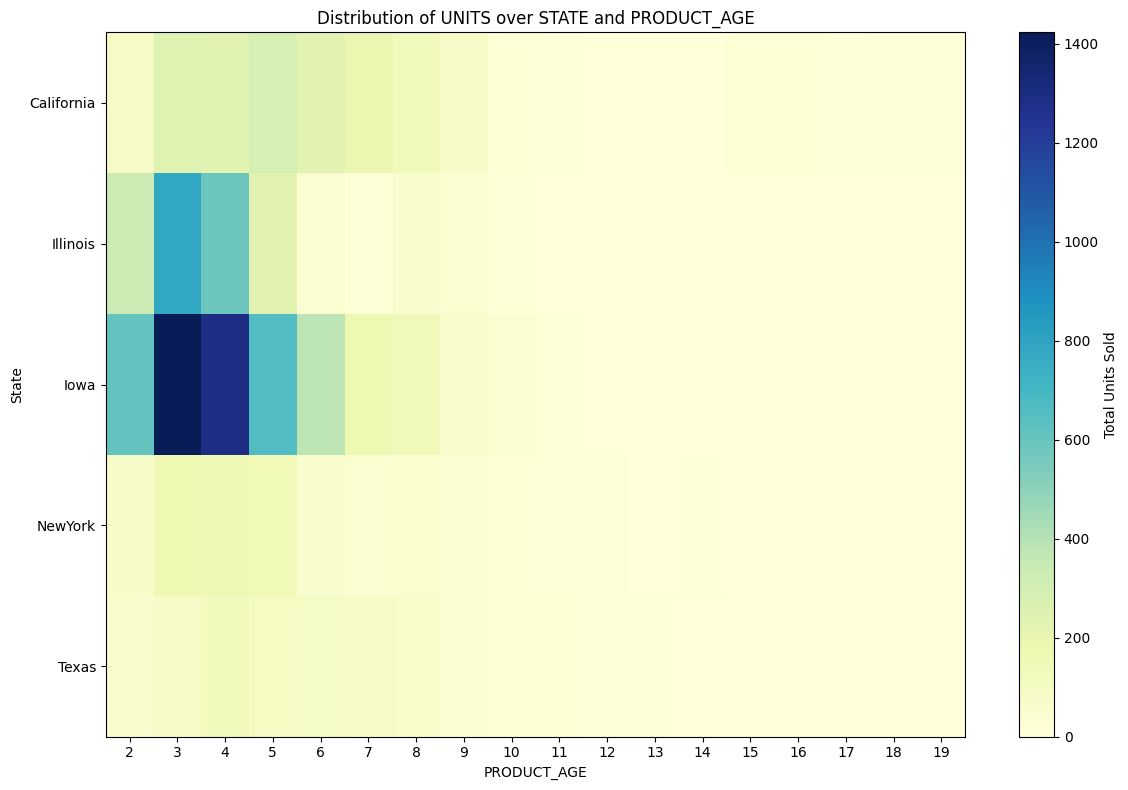

In [15]:
# prompt: create dist map of "UNITS" over STATE/SALESYEAR

distribution = df.groupby(['STATE', 'PRODUCT_AGE'])['UNITS'].sum().reset_index()

# You can display the resulting DataFrame
print(distribution)

# To visualize this distribution as a heatmap or similar,
# you might need to reshape the data. Let's create a pivot table.
pivot_table = distribution.pivot(index='STATE', columns='PRODUCT_AGE', values='UNITS').fillna(0)

# Display the pivot table
# print("\nPivot Table:")
# print(pivot_table)

# You can then visualize this pivot table as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(pivot_table, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Total Units Sold')
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)
plt.xlabel('PRODUCT_AGE')
plt.ylabel('State')
plt.title('Distribution of UNITS over STATE and PRODUCT_AGE')
plt.tight_layout()
plt.show()

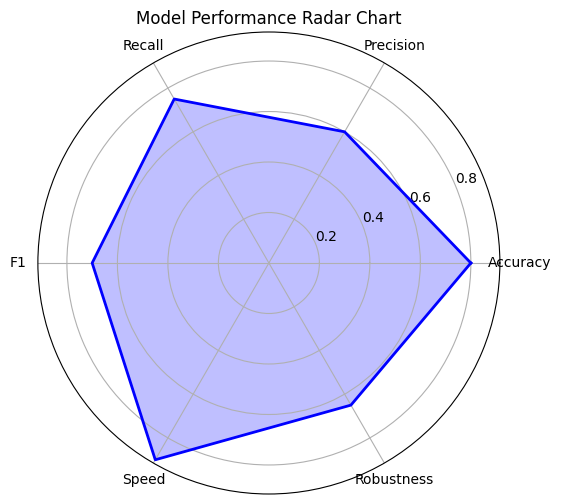

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 六个属性
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Speed', 'Robustness']
num_vars = len(labels)

# 属性值（0-1 归一化）
values = [0.8, 0.6, 0.75, 0.7, 0.9, 0.65]

# 角度设置
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]  # 闭合图形
angles += angles[:1]

# 绘图
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='b', linewidth=2)
ax.fill(angles, values, color='b', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8'])
ax.set_title('Model Performance Radar Chart')
plt.show()
